# <center>Laboratorium <br>Metod Numerycznych <br> Aproksymacja</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev, BSpline



Aproksymacja funkcji jest fundamentalnym zagadnieniem w analizie numerycznej, które polega na przybliżaniu funkcji bardziej skomplikowanej przez funkcję prostszą. Jest to szczególnie użyteczne w przypadkach, kiedy mamy do czynienia z funkcjami trudnymi do analizy lub gdy potrzebujemy szybkich obliczeń numerycznych.

**[Metoda Najmniejszych Kwadratów](https://en.wikipedia.org/wiki/Least_squares)**

Metoda najmniejszych kwadratów jest jedną z najczęściej stosowanych technik aproksymacji. Polega ona na minimalizacji sumy kwadratów różnic między wartościami obserwowanymi a wartościami przewidywanymi przez model aproksymacyjny. Matematycznie, jeśli mamy zbiór danych $(x_i, y_i)$, szukamy funkcji $f(x)$, która minimalizuje:
$
S = \sum_{i=1}^n \left(y_i - f(x_i)\right)^2
$

**[Funkcje Sklejane (Splines)](https://en.wikipedia.org/wiki/Spline_(mathematics))**

Funkcje sklejane, znane również jako splines, to kolejna popularna technika aproksymacji. Splines to ciągłe i gładkie funkcje, które są definiowane kawałkami przez wielomiany. W przeciwieństwie do globalnych metod aproksymacji, jak wielomiany wysokiego stopnia, splines unikają problemu oscylacji, oferując lepszą kontrolę nad kształtem krzywej aproksymacyjnej.

**[B-Splines](https://en.wikipedia.org/wiki/B-spline)**

B-Splines, czyli bazowe splines, stanowią rozszerzenie idei funkcji sklejanych. Są to specjalne rodzaje splines, które zapewniają dodatkową elastyczność i kontrolę nad kształtem krzywej. B-Splines są zdefiniowane jako liniowa kombinacja funkcji bazowych.

***Zadanie 1.***

Napisz skrypt w języku Python, który dokona aproksymacji liniowej funkcji sinus:

$$y = sin(x)$$

na przedziale od 0 do 2π używając metody najmniejszych kwadratów. Wygeneruj zbiór danych składający się z minimum 50 punktów z równymi odstępami w tym przedziale. Twoje zadanie polega na znalezieniu najlepiej dopasowanej linii prostej do tych danych.

Rozwiązanie powinno zawierać nasstępujące punkty:

1) Wygeneruj zbiór danych (x, y), gdzie y to wartości sin(x).
2) Napisz funkcję wykonującą aproksymację liniową metodą najmniejszych kwadratów (funkcja *linear_least_squares* z main.py).
3) Wyświetl oryginalne dane i dopasowaną linię na wykresie.

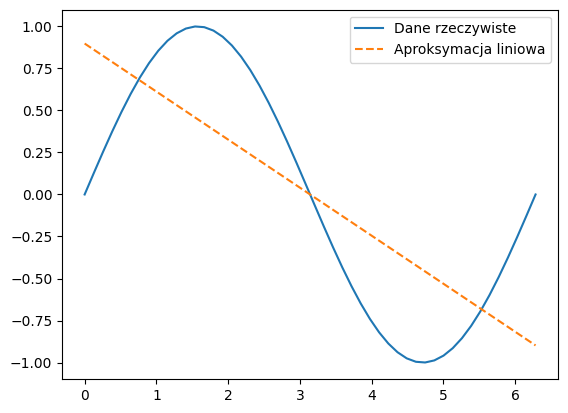

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from main import linear_least_squares

x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

coefficients = linear_least_squares(x, y)

y_predicted = coefficients[1] * x + coefficients[0]

plt.plot(x, y, label='Dane rzeczywiste')
plt.plot(x, y_predicted, label='Aproksymacja liniowa', linestyle='--')
plt.legend()
plt.show()


Metoda liniowa próbuje dopasować prostą do funkcji sinusoidalnej, co nie jest w stanie idealnie odzwierciedlić charakterystyki funkcji sinus. Aproksymacja liniowa może być użyteczna w przypadku danych, które wykazują liniową zależność, jednak w przypadku funkcji sinus należy wykorzystać bardziej złożone modele aproksymacyjne, aby uzyskać lepsze dopasowanie do rzeczywistych danych.

***Zadanie 2.***

Napisz skrypt w języku Python, który dokona aproksymacji wielmianowej stopnia pierwszego oraz trzeciego funkcji z poprzedniego zadania równiez na przedziale od 0 do 2π, używając metody najmniejszych kwadratów. 
Wygeneruj zbiór danych składający się z minimum 50 punktów z równymi odstępami w tym przedziale.
Do wykonania obu aproksymacji uzyj funkcji *np.polyfit*. oraz *np.poly1d*.
Zobrazuj obie aproksymacji w zestawieniu z oryginalną funkcją na jednym wykresie.


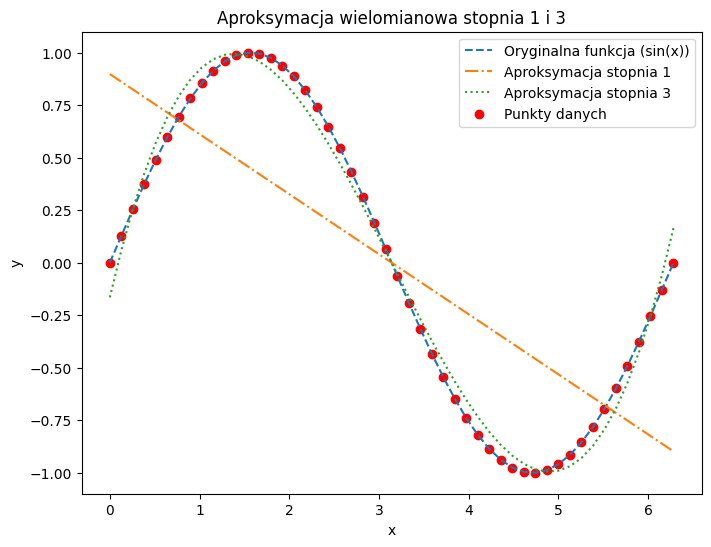

In [3]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

coefficients_first_degree = np.polyfit(x, y, 1)
polynomial_first_degree = np.poly1d(coefficients_first_degree)

coefficients_third_degree = np.polyfit(x, y, 3)
polynomial_third_degree = np.poly1d(coefficients_third_degree)

y_first_degree = polynomial_first_degree(x)
y_third_degree = polynomial_third_degree(x)

plt.figure(figsize=(8, 6))
plt.plot(x,y, label='Oryginalna funkcja (sin(x))', linestyle='--')
plt.plot(x, y_first_degree, label='Aproksymacja stopnia 1', linestyle='-.')
plt.plot(x, y_third_degree, label='Aproksymacja stopnia 3', linestyle=':')
plt.scatter(x, y, label='Punkty danych', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproksymacja wielomianowa stopnia 1 i 3')
plt.show()

Wykorzystanie aproksymacji wielomianowej stopnia 1 i 3 dla funkcji sinus pozwoliło na stworzenie dwóch różnych aproksymacji. Aproksymacja stopnia 1 jest zbyt prostym modelem, który nie jest w stanie dokładnie odwzorować skomplikowanego kształtu funkcji sinusoidalnej, podczas gdy wielomian stopnia 3 lepiej pasuje do danych. Istotne jest wyważenie pomiędzy stopniem wielomianu a dokładnością aproksymacji, ponieważ zbyt wysoki stopień wielomianu może prowadzić do przeuczenia modelu, a zbyt niski może doprowadzić do niedostatecznego dopasowania.

***Zadanie 3.***

Napisz skrypt w języku Python, który dokona aproksymacji funckjami sklejanymi stopnia trzeciego funkcji na przedziale $[-1;1]$:

$$f(x) = \frac{1}{1 + 25x^2}$$

Wygeneruj dwa warianty danych dla funkcji:
Pierwszy zestaw z 15 równomiernie rozłożonymi punktami.
Drugi zestaw z 15 punktami węzłów Czebyszewa (za pomoca funkcji *cheb_roots* z pliku main.py).

Następnie dokonaj aproksymacji tych danych przy użyciu funkcji sklejanych (splajnów) trzeciego stopnia dla obu zestawów punktów.
Wyświetl na wykresie zarówno wygenerowane dane, krzywe aproksymacji dla obu zestawów punktów, jak i oryginalny przebieg funkcji.
Wykorzystaj funkcje scipy.interpolate.splrep i scipy.interpolate.splev z biblioteki SciPy do stworzenia i ewaluacji splajnów.
Do wizualizacji wyników użyj matplotlib.

Porównaj jakość dopasowania dla obu przypadków i zwróć uwagę na efekt Rungego. 
*Czy wykorzystanie węzłów Czebysheva jest dobrym rozwiązaniem eliminacji problem efektu Rungego w tym przypadku? Uzasadnij odpowiedź.*



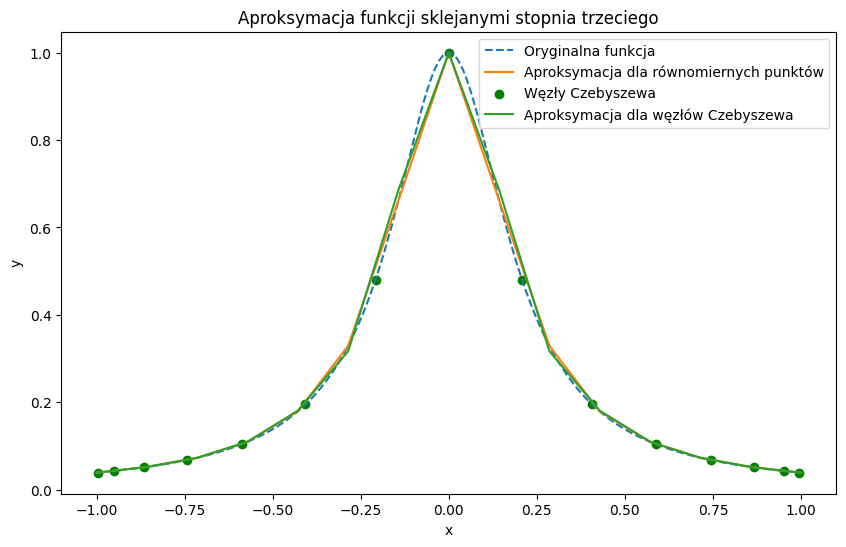

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from main import chebyshev_nodes

x = np.linspace(0, 2*np.pi, 50)
def f(x):
    return 1 / (1 + 25 * x ** 2)

x_uniform = np.linspace(-1, 1, 15)
y_uniform = f(x_uniform)

cheb_nodes = chebyshev_nodes(15, (-1, 1))
y_cheb = f(cheb_nodes)

spl_uniform = splrep(x_uniform, y_uniform)
y_spline_uniform = splev(x_uniform, spl_uniform)

spl_cheb = splrep(cheb_nodes, y_cheb)
y_spline_cheb = splev(x_uniform, spl_cheb)

x_values = np.linspace(-1, 1, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label='Oryginalna funkcja', linestyle='--')
plt.plot(x_uniform, y_spline_uniform, label='Aproksymacja dla równomiernych punktów')
plt.scatter(cheb_nodes, y_cheb, label='Węzły Czebyszewa', color='green')
plt.plot(x_uniform, y_spline_cheb, label='Aproksymacja dla węzłów Czebyszewa')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproksymacja funkcji sklejanymi stopnia trzeciego')
plt.show()


***Zadanie 4.***

Napisz skrypt w języku Python, który dokona aproksymacji funckjami Bspline na przedziale $[-5;5]$:

$$y = \sin(x) + 0.1x^2$$

używając 20 równomiernie rozłożonych punktów jako danych.Użyj B-splajnów do aproksymacji tych danych. Zastosuj B-splajny trzeciego stopnia. Porównaj krzywą aproksymacji z oryginalnymi danymi na wykresie. Podaj krótką analizę jakości dopasowania B-splajnów do danych.

Do utworzenia tej aproksymacji przydatne będą funkcje: *scipy.interpolate.splrep* oraz *scipy.interpolate.BSpline*




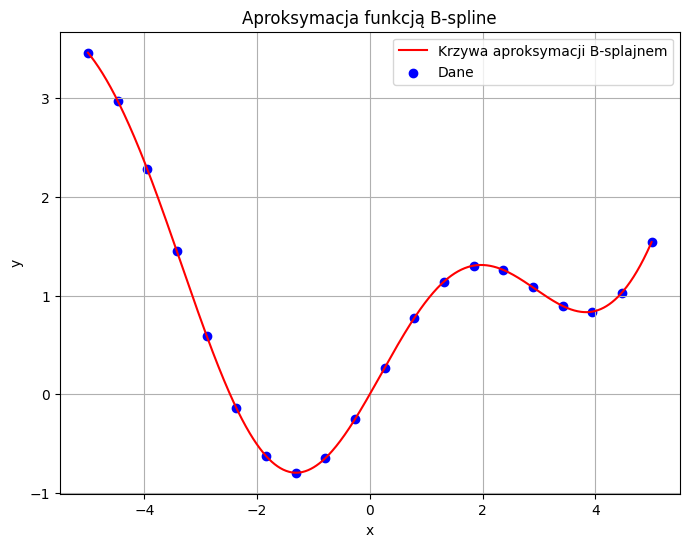

In [10]:
def f(x):
    return np.sin(x) + 0.1 * x**2

x_data = np.linspace(-5, 5, 20)
y_data = f(x_data)

spl = splrep(x_data, y_data, k=3)  # B-splajny trzeciego stopnia
bspline = BSpline(spl[0], spl[1], spl[2], extrapolate=False)  # Tworzenie obiektu B-splajnu

x_values = np.linspace(-5, 5, 1000)
y_values = bspline(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Krzywa aproksymacji B-splajnem', color='red')
plt.scatter(x_data, y_data, label='Dane', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproksymacja funkcją B-spline')
plt.legend()
plt.grid(True)
plt.show()

Zastosowanie B-splajnów trzeciego stopnia do aproksymacji funkcji dla 20 równomiernie rozłożonych punktów na przedziale  pozwoliło na uzyskanie gładkiej krzywej aproksymacji, dobrze odwzorowującej oryginalne dane. Dokładność i elastyczność B-splajnów w dopasowywaniu krzywej do danych została widocznie zaprezentowana na wykresie, umożliwiając wizualną ocenę dopasowania krzywej do punktów danych.

Wnioski:
Na dzisiejszych zajęciach zapoznałem się z metodą najmniejszych kwadratów. Umożliwia ona skuteczną aproksymację parametrów funkcji. Metody aproksymacji, takie jak B-splajny trzeciego stopnia i metoda najmniejszych kwadratów, zapewniają skuteczne narzędzia do dopasowania modelu do danych, umożliwiając elastyczne modelowanie funkcji. Jednak ich efektywność i dokładność są zależne od rozkładu punktów danych, stabilności danych wejściowych oraz adekwatnego doboru stopnia modelu, co wymaga uwagi i ostrożności przy wyborze odpowiedniej metody aproksymacji.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)